In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [23]:
pay = pd.read_csv("../../Data/companies/정제_월평균임금_임금상승률(2013~2022).csv")
industries = pd.read_csv("../../Data/companies/정제_업종_전부(2013~2020).csv")
companies = pd.read_csv("../../Data/companies/정제_시도별_전체_기업수(2013~2020).csv")

In [24]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         170 non-null    object 
 1   년도         170 non-null    int64  
 2   상용_월평균_임금  170 non-null    float64
 3   임금상승률      170 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ KB


In [25]:
len(pay)

170

In [26]:
len(companies)

136

In [27]:
pd.concat([pay, companies], axis=1)

,시도,년도,상용_월평균_임금,임금상승률,시도,년도,활동,신생,소멸
0,서울특별시,2013,3168798.0,5.4,서울특별시,2013.0,1258829.0,168425.0,150812.0
1,부산광역시,2013,2520222.0,2.7,부산광역시,2013.0,370922.0,49110.0,43743.0
2,대구광역시,2013,2315945.0,2.3,대구광역시,2013.0,255803.0,33186.0,28898.0
3,인천광역시,2013,2609457.0,4.0,인천광역시,2013.0,278236.0,41563.0,37133.0
4,광주광역시,2013,2417477.0,4.2,광주광역시,2013.0,142802.0,22274.0,19665.0
...,...,...,...,...,...,...,...,...,...
165,전라북도,2022,3192759.0,3.6,NaN,NaN,NaN,NaN,NaN
166,전라남도,2022,3445263.0,2.8,NaN,NaN,NaN,NaN,NaN
167,경상북도,2022,3563537.0,3.2,NaN,NaN,NaN,NaN,NaN
168,경상남도,2022,3560180.0,4.7,NaN,NaN,NaN,NaN,NaN


In [28]:
pay.corr()

,년도,상용_월평균_임금,임금상승률
년도,1.000000,0.489158,0.211368
상용_월평균_임금,0.489158,1.000000,0.407682
임금상승률,0.211368,0.407682,1.000000


In [29]:
companies.corr()

,년도,활동,신생,소멸
년도,1.000000,0.069110,0.086163,0.024170
활동,0.069110,1.000000,0.995701,0.992833
신생,0.086163,0.995701,1.000000,0.988414
소멸,0.024170,0.992833,0.988414,1.000000


In [30]:
pd.concat([pay, companies], axis=1).corr()

,년도,상용_월평균_임금,임금상승률,년도,활동,신생,소멸
년도,1.000000,0.489158,0.211368,1.000000,0.069110,0.086163,0.024170
상용_월평균_임금,0.489158,1.000000,0.407682,0.338964,0.359854,0.347412,0.345815
임금상승률,0.211368,0.407682,1.000000,0.020367,0.116129,0.107762,0.095966
년도,1.000000,0.338964,0.020367,1.000000,0.069110,0.086163,0.024170
활동,0.069110,0.359854,0.116129,0.069110,1.000000,0.995701,0.992833
신생,0.086163,0.347412,0.107762,0.086163,0.995701,1.000000,0.988414
소멸,0.024170,0.345815,0.095966,0.024170,0.992833,0.988414,1.000000


<AxesSubplot: >

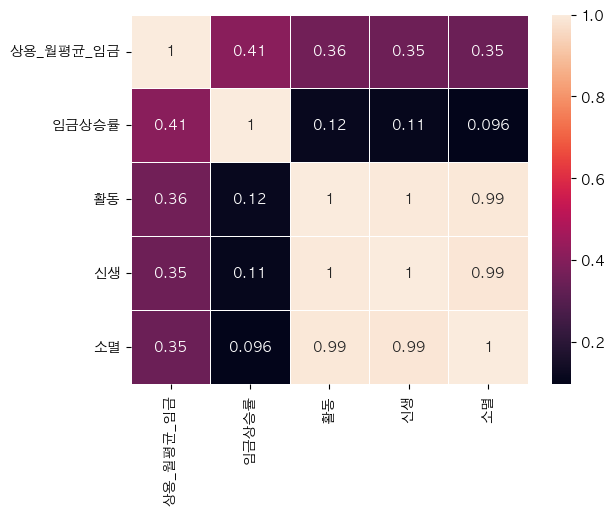

In [31]:
sns.heatmap(
    pd.concat([pay, companies], axis=1)[['상용_월평균_임금', '임금상승률', '활동', '신생', '소멸']].corr(),
    annot=True,
    linewidths= 0.5,
)

- 활동, 신생, 소멸은 셋 중 하나만 써야함

<AxesSubplot: >

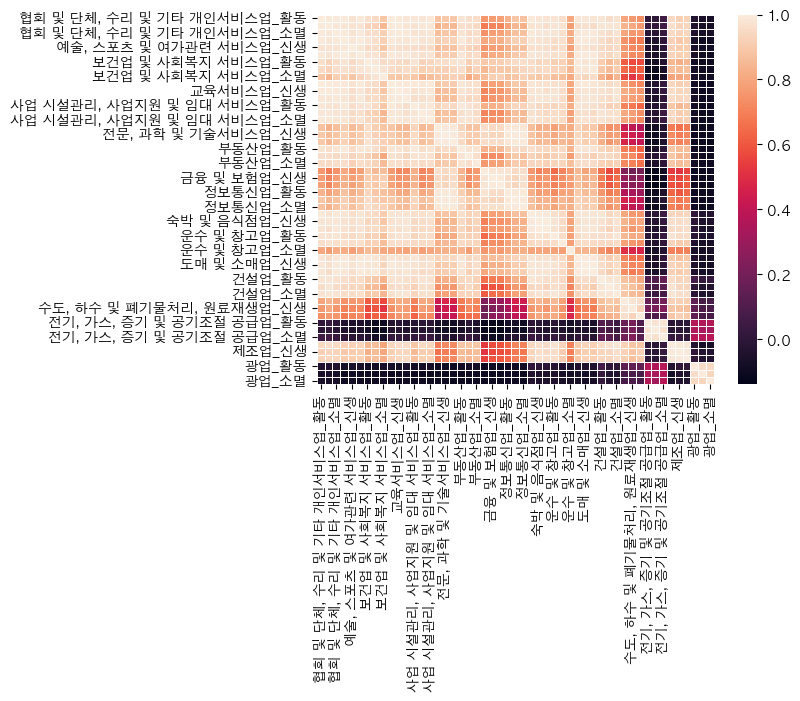

In [32]:
sns.heatmap(
    industries.iloc[:, :52].corr(),
    # annot=True,
    linewidths= 0.5,
)

In [33]:
industries.columns[:52]

Index(['협회 및 단체, 수리 및 기타 개인서비스업_활동', '협회 및 단체, 수리 및 기타 개인서비스업_신생',
       '협회 및 단체, 수리 및 기타 개인서비스업_소멸', '예술, 스포츠 및 여가관련 서비스업_활동',
       '예술, 스포츠 및 여가관련 서비스업_신생', '예술, 스포츠 및 여가관련 서비스업_소멸',
       '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생', '보건업 및 사회복지 서비스업_소멸',
       '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸', '사업 시설관리, 사업지원 및 임대 서비스업_활동',
       '사업 시설관리, 사업지원 및 임대 서비스업_신생', '사업 시설관리, 사업지원 및 임대 서비스업_소멸',
       '전문, 과학 및 기술서비스업_활동', '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸',
       '부동산업_활동', '부동산업_신생', '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생',
       '금융 및 보험업_소멸', '정보통신업_활동', '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동',
       '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸', '운수 및 창고업_활동', '운수 및 창고업_신생',
       '운수 및 창고업_소멸', '도매 및 소매업_활동', '도매 및 소매업_신생', '도매 및 소매업_소멸', '건설업_활동',
       '건설업_신생', '건설업_소멸', '수도, 하수 및 폐기물처리, 원료재생업_활동',
       '수도, 하수 및 폐기물처리, 원료재생업_신생', '수도, 하수 및 폐기물처리, 원료재생업_소멸',
       '전기, 가스, 증기 및 공기조절 공급업_활동', '전기, 가스, 증기 및 공기조절 공급업_신생',
       '전기, 가스, 증기 및 공기조절 공급업_소멸', '제조업_활동', '제조업_신

<AxesSubplot: >

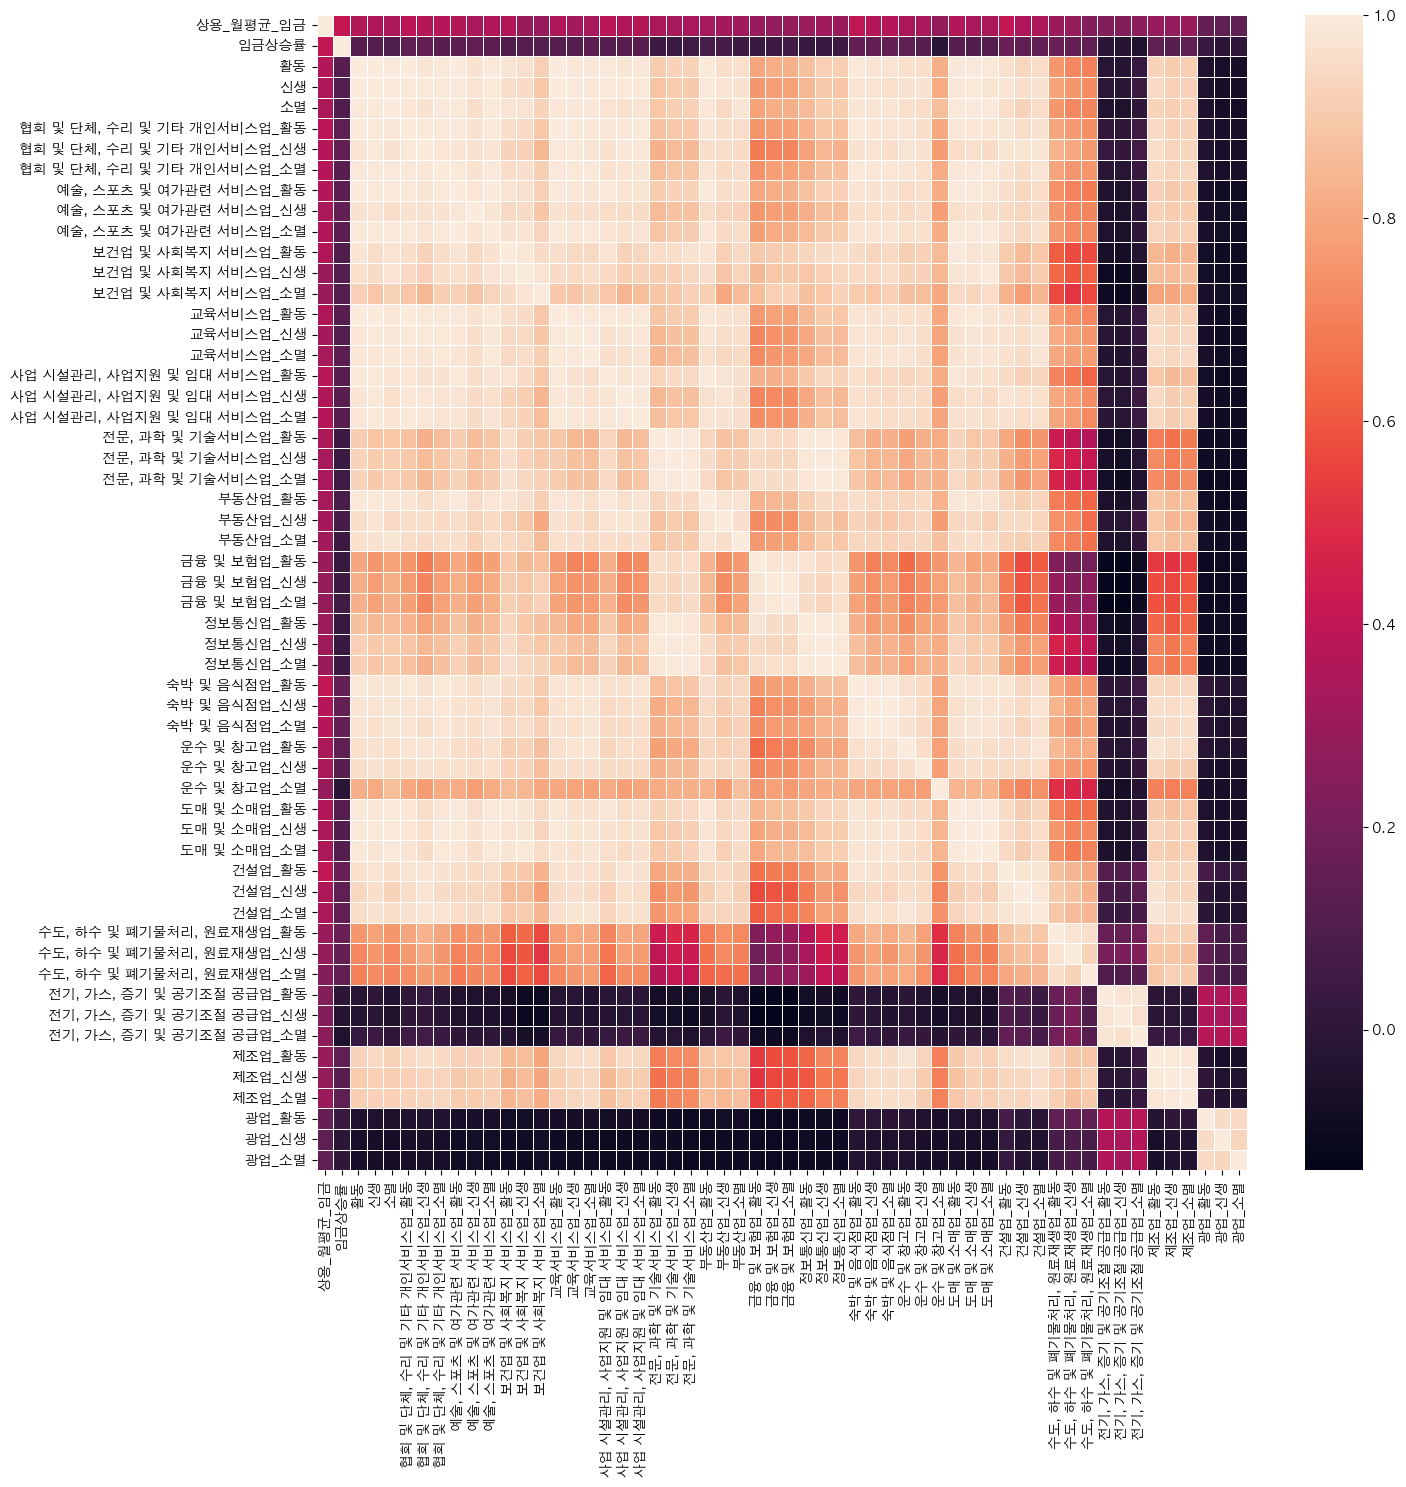

In [34]:
aa = pd.concat([pay, companies], axis=1)[['상용_월평균_임금', '임금상승률', '활동', '신생', '소멸']]
bb = pd.concat([aa, industries.iloc[:, :52]], axis=1)
plt.figure(figsize = (15,15))

sns.heatmap(
    bb.corr(),
    annot_kws={"size": 3},
    linewidths= 0.5,
)

In [35]:
companies['시도']
# industries['지역별']

0        서울특별시
1        부산광역시
2        대구광역시
3        인천광역시
4        광주광역시
        ...   
131       전라북도
132       전라남도
133       경상북도
134       경상남도
135    제주특별자치도
Name: 시도, Length: 136, dtype: object

In [36]:
pd.unique(pay['시도'])

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [37]:
sido = []
for i in companies['시도']:
    if i == '서울':
        sido.append('서울특별시')
    elif i == '부산':
        sido.append('부산광역시')
    elif i == '대구':
        sido.append('대구광역시')
    elif i == '인천':
        sido.append('인천광역시')
    elif i == '광주':
        sido.append('광주광역시')
    elif i == '대전':
        sido.append('대전광역시')
    elif i == '울산':
        sido.append('울산광역시')
    elif i == '세종':
        sido.append('세종특별자치시')
    elif i == '경기':
        sido.append('경기도')
    elif i == '강원':
        sido.append('강원도')
    elif i == '충북':
        sido.append('충청북도')
    elif i == '충남':
        sido.append('충청남도')
    elif i == '전북':
        sido.append('전라북도')
    elif i == '전남':
        sido.append('전라남도')
    elif i == '경북':
        sido.append('경상북도')
    elif i == '경남':
        sido.append('경상남도')
    elif i == '제주':
        sido.append('제주특별자치도')
sido

[]

In [38]:
companies['시도'] = sido

ValueError: Length of values (0) does not match length of index (136)

In [ ]:
sido = []
for i in industries['지역별']:
    if i == '서울':
        sido.append('서울특별시')
    elif i == '부산':
        sido.append('부산광역시')
    elif i == '대구':
        sido.append('대구광역시')
    elif i == '인천':
        sido.append('인천광역시')
    elif i == '광주':
        sido.append('광주광역시')
    elif i == '대전':
        sido.append('대전광역시')
    elif i == '울산':
        sido.append('울산광역시')
    elif i == '세종':
        sido.append('세종특별자치시')
    elif i == '경기':
        sido.append('경기도')
    elif i == '강원':
        sido.append('강원도')
    elif i == '충북':
        sido.append('충청북도')
    elif i == '충남':
        sido.append('충청남도')
    elif i == '전북':
        sido.append('전라북도')
    elif i == '전남':
        sido.append('전라남도')
    elif i == '경북':
        sido.append('경상북도')
    elif i == '경남':
        sido.append('경상남도')
    elif i == '제주':
        sido.append('제주특별자치도')
    else:
        sido.append('전국')
        
len(sido)
industries.drop('지역별', axis=1, inplace=True)
industries['시도'] = sido

KeyError: '지역별'

In [ ]:
pd.unique(industries['지역별'])

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [39]:
# industries.to_csv("../../Data/companies/정제_업종_전부(2013~2020).csv", encoding='utf-8', index=False)

In [ ]:
# companies.to_csv("../../Data/companies/정제_시도별_전체_기업수(2013~2020).csv", encoding='utf-8', index=False)

In [ ]:
companies

,시도,년도,활동,신생,소멸
0,서울특별시,2013,1258829,168425,150812
1,부산광역시,2013,370922,49110,43743
2,대구광역시,2013,255803,33186,28898
3,인천광역시,2013,278236,41563,37133
4,광주광역시,2013,142802,22274,19665
...,...,...,...,...,...
131,전라북도,2020,224779,35752,23203
132,전라남도,2020,219445,34249,22803
133,경상북도,2020,322277,44946,33437
134,경상남도,2020,403797,58729,45268


In [40]:
industries

,"협회 및 단체, 수리 및 기타 개인서비스업_활동","협회 및 단체, 수리 및 기타 개인서비스업_신생","협회 및 단체, 수리 및 기타 개인서비스업_소멸","예술, 스포츠 및 여가관련 서비스업_활동","예술, 스포츠 및 여가관련 서비스업_신생","예술, 스포츠 및 여가관련 서비스업_소멸",보건업 및 사회복지 서비스업_활동,보건업 및 사회복지 서비스업_신생,보건업 및 사회복지 서비스업_소멸,교육서비스업_활동,...,"전기, 가스, 증기 및 공기조절 공급업_활동","전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸",제조업_활동,제조업_신생,제조업_소멸,광업_활동,광업_신생,광업_소멸,시도
0,47929,5870,6229,24426,4488,4716,18641,1666,1389,28184,...,163,45,9,74080,7362,6401,53,6,4,서울특별시
1,17554,1892,2093,6967,1146,1292,5023,394,280,8354,...,39,14,1,35083,3208,2694,13,1,1,부산광역시
2,11126,1400,1301,5129,862,929,3773,245,192,6666,...,86,11,1,29884,2640,1936,12,4,4,대구광역시
3,12099,1931,1769,6050,1218,1283,3263,298,223,5995,...,54,10,2,30778,3168,2594,21,1,1,인천광역시
4,7586,1086,1086,3430,782,841,2186,221,166,4819,...,151,62,5,9376,1051,808,15,2,0,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,11770,1675,1260,3933,713,674,2696,132,94,6035,...,18102,5800,496,14377,1573,1216,90,9,8,전라북도
132,11167,1733,1342,3663,752,670,2198,101,83,4567,...,10767,3502,378,14892,1720,1310,528,128,117,전라남도
133,17024,2354,1827,5765,930,983,3021,119,120,7648,...,7750,2617,260,34547,3277,2702,189,13,20,경상북도
134,21223,3176,2337,6929,1155,1185,4074,197,159,11810,...,4140,1286,130,47130,4090,3648,86,11,9,경상남도


In [42]:
len(industries)

136

In [43]:
17*8

136

In [46]:
years = []

for i in range(2013, 2021):
    for _ in range(17):
        years.append(i)
years

[2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020]

In [47]:
industries['년도'] = years
industries

,"협회 및 단체, 수리 및 기타 개인서비스업_활동","협회 및 단체, 수리 및 기타 개인서비스업_신생","협회 및 단체, 수리 및 기타 개인서비스업_소멸","예술, 스포츠 및 여가관련 서비스업_활동","예술, 스포츠 및 여가관련 서비스업_신생","예술, 스포츠 및 여가관련 서비스업_소멸",보건업 및 사회복지 서비스업_활동,보건업 및 사회복지 서비스업_신생,보건업 및 사회복지 서비스업_소멸,교육서비스업_활동,...,"전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸",제조업_활동,제조업_신생,제조업_소멸,광업_활동,광업_신생,광업_소멸,시도,년도
0,47929,5870,6229,24426,4488,4716,18641,1666,1389,28184,...,45,9,74080,7362,6401,53,6,4,서울특별시,2013
1,17554,1892,2093,6967,1146,1292,5023,394,280,8354,...,14,1,35083,3208,2694,13,1,1,부산광역시,2013
2,11126,1400,1301,5129,862,929,3773,245,192,6666,...,11,1,29884,2640,1936,12,4,4,대구광역시,2013
3,12099,1931,1769,6050,1218,1283,3263,298,223,5995,...,10,2,30778,3168,2594,21,1,1,인천광역시,2013
4,7586,1086,1086,3430,782,841,2186,221,166,4819,...,62,5,9376,1051,808,15,2,0,광주광역시,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,11770,1675,1260,3933,713,674,2696,132,94,6035,...,5800,496,14377,1573,1216,90,9,8,전라북도,2020
132,11167,1733,1342,3663,752,670,2198,101,83,4567,...,3502,378,14892,1720,1310,528,128,117,전라남도,2020
133,17024,2354,1827,5765,930,983,3021,119,120,7648,...,2617,260,34547,3277,2702,189,13,20,경상북도,2020
134,21223,3176,2337,6929,1155,1185,4074,197,159,11810,...,1286,130,47130,4090,3648,86,11,9,경상남도,2020


In [48]:
industries.to_csv("../../Data/companies/정제_업종_전부(2013~2020).csv", encoding='utf-8', index=False)